In [26]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
def sample(sigma, n):
    return np.random.normal(scale=np.sqrt(sigma), size=n)

In [28]:
def S_interval(X, gamma):
    left = scipy.stats.chi2(X.shape[0]).ppf((1 + gamma) / 2)
    right = scipy.stats.chi2(X.shape[0]).ppf((1 - gamma) / 2)
    stat = np.sum(np.power(X, 2))
    return stat / left, stat / right


def M2_interval(X, gamma):
    left = scipy.stats.norm().ppf((3 + gamma) / 4) ** 2
    right = scipy.stats.norm().ppf((3 - gamma) / 4) ** 2
    stat = np.mean(X) ** 2 * X.shape[0]
    return stat / left, stat / right


In [29]:
gamma = 0.95
sigma = 1

In [30]:
sns.set()
sdata_left = []
sdata_right = []
mdata_left = []
mdata_right = []
ns = list(range(10, 10000, 100))
for i in ns:
    X = sample(sigma, i)
    
    left, right = S_interval(X, gamma)
    sdata_left.append(left)
    sdata_right.append(right)
    
    left, right = M2_interval(X, gamma)
    mdata_left.append(left)
    mdata_right.append(right)

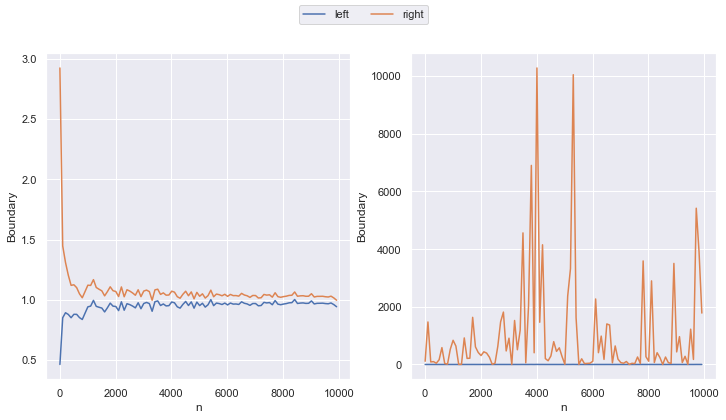

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(ns, sdata_left, label="left")
ax[0].plot(ns, sdata_right, label="right")
ax[1].plot(ns, mdata_left, label="left")
ax[1].plot(ns, mdata_right, label="right")
ax[0].set_xlabel("n")
ax[1].set_xlabel("n")
ax[0].set_ylabel("Boundary")
ax[1].set_ylabel("Boundary")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2)
plt.show()

Вторая оценка является несостоятельной, что не удивительно, т.к. матожидание такой статистики для выборки из нормального распределения со средним 0 будет 0, что не очень похоже на значение дисперсии.